In [ ]:
%matplotlib inline

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.special import comb

## Exploratory Data Analysis

In [30]:
cc_df = pd.read_csv('data/call-center-dataset.csv')

cc_df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,Y,Y,109.0,0:02:23,3.0
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,Y,N,70.0,0:04:02,3.0
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,Y,Y,10.0,0:02:11,3.0
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,Y,Y,53.0,0:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,0:01:00,3.0


In [33]:
cc_df['Date'] = pd.to_datetime(cc_df['Date'])
cc_df['Time'] = pd.to_datetime(cc_df['Time'], format='%H:%M:%S').dt.time
cc_df['AvgTalkDuration'] = pd.to_timedelta(cc_df['AvgTalkDuration']).dt.total_seconds()

# # Add interarrival column
# cc_df['Interarrival'] = (
#     (cc_df['Date'] == cc_df['Date'].shift())
#     * (
#         cc_df['Time'].apply(lambda x: pd.Timedelta(hours=x.hour, minutes=x.minute, seconds=x.second).total_seconds())
#         - cc_df['Time'].shift().apply(lambda x: pd.Timedelta(hours=x.hour, minutes=x.minute, seconds=x.second).total_seconds())
#     )
# ).fillna(0)

cc_df.head(10)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,1.430000e-07,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,2.420000e-07,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,1.310000e-07,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,3.700000e-08,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,6.000000e-08,3.0
5,ID0006,Stewart,2021-01-01,10:00:29,Technical Support,N,N,NaN,NaN,NaN
6,ID0007,Diane,2021-01-01,10:22:05,Payment related,Y,Y,24.0,2.200000e-07,2.0
7,ID0008,Diane,2021-01-01,10:22:05,Payment related,Y,Y,22.0,3.800000e-08,4.0
8,ID0009,Greg,2021-01-01,11:13:55,Admin Support,Y,Y,15.0,3.980000e-07,4.0
9,ID0010,Jim,2021-01-01,11:13:55,Streaming,Y,Y,78.0,6.400000e-08,3.0


In [32]:
cc_df.describe()

,Date,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
count,5000,4054.000000,4054.000000,4054.000000
mean,2021-02-13 05:32:38.400000256,67.520720,224.922792,3.403552
min,2021-01-01 00:00:00,10.000000,30.000000,1.000000
25%,2021-01-23 00:00:00,39.000000,130.000000,3.000000
50%,2021-02-13 00:00:00,68.000000,226.000000,3.000000
75%,2021-03-06 00:00:00,97.000000,319.000000,4.000000
max,2021-03-31 00:00:00,125.000000,420.000000,5.000000
std,NaN,33.592872,111.381555,1.212220


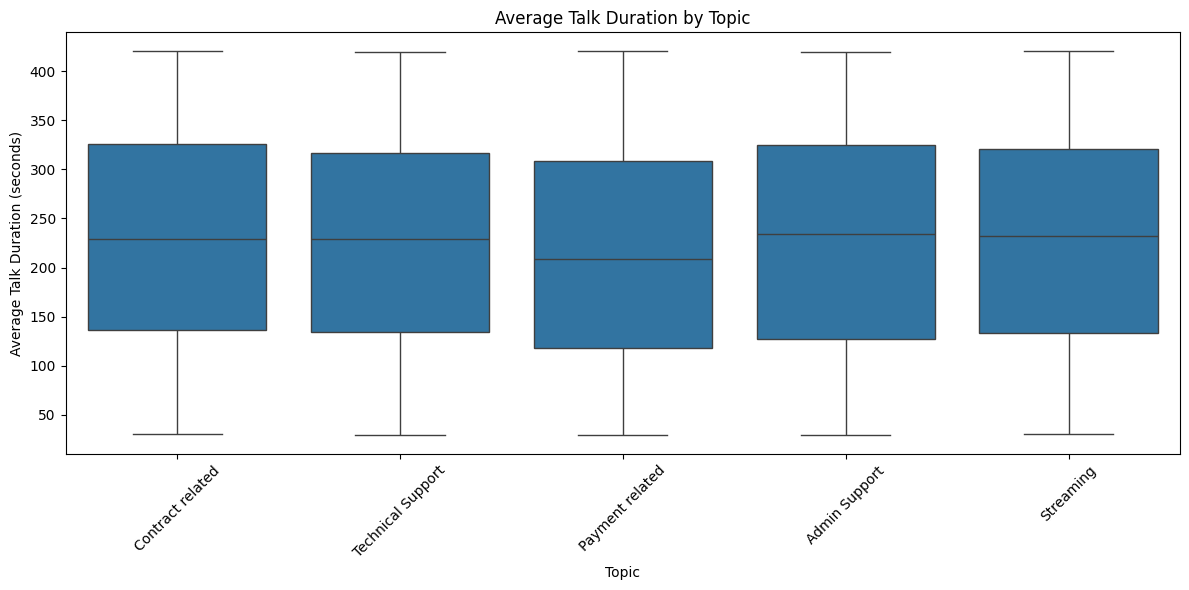

In [16]:
# Plot the AvgTalkDuration group by topic
plt.figure(figsize=(12, 6))
sns.boxplot(x='Topic', y='AvgTalkDuration', data=cc_df)
plt.title('Average Talk Duration by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Talk Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()